In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from pandas_datareader import DataReader

In [0]:
from datetime import datetime

In [0]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [0]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,234.032669,229.839921,231.701394,232.149761,2.878785e+07,230.751857
std,45.055484,44.217655,44.561604,44.795151,1.172896e+07,45.387777
min,173.070007,169.500000,170.320007,172.500000,1.136200e+07,170.271317
25%,200.675003,198.019997,199.000000,199.239998,2.109725e+07,196.944923
50%,213.970001,210.320007,212.000000,211.750000,2.622090e+07,209.233765
75%,266.800003,262.625000,264.665009,265.669998,3.294945e+07,265.040970
max,327.850006,323.350006,324.739990,327.200012,1.066275e+08,327.200012


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-03-04 to 2020-02-28
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


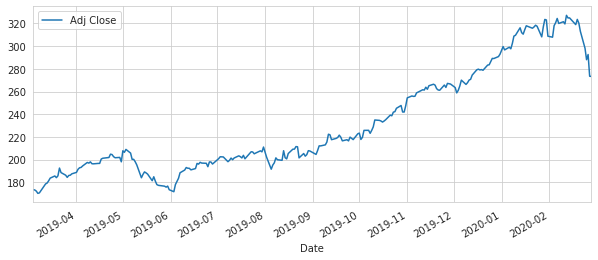

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

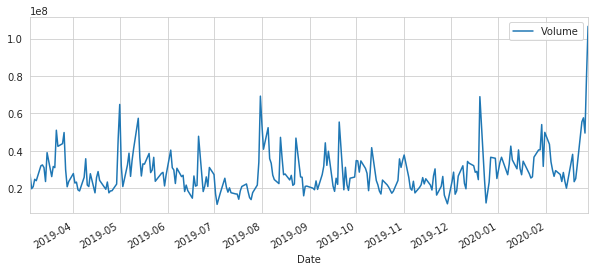

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [0]:
ma_day = [10,20,50]
for ma in ma_day:
  column_name = 'MA {}'.format(ma)
  AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [15]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-03-04,177.750000,173.970001,175.690002,175.850006,27436200.0,173.578033,NaN,NaN,NaN
2019-03-05,176.000000,174.539993,175.940002,175.529999,19737400.0,173.262161,NaN,NaN,NaN
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,172.265228,NaN,NaN,NaN
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400.0,170.271317,NaN,NaN,NaN
2019-03-08,173.070007,169.500000,170.320007,172.910004,23999400.0,170.676025,NaN,NaN,NaN


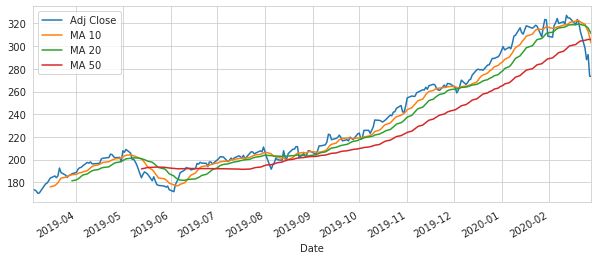

In [17]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [0]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [19]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Dayly Return
Date,,,,,,,,,,
2019-03-04,177.750000,173.970001,175.690002,175.850006,27436200.0,173.578033,NaN,NaN,NaN,NaN
2019-03-05,176.000000,174.539993,175.940002,175.529999,19737400.0,173.262161,NaN,NaN,NaN,-0.001820
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,172.265228,NaN,NaN,NaN,-0.005754
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400.0,170.271317,NaN,NaN,NaN,-0.011575
2019-03-08,173.070007,169.500000,170.320007,172.910004,23999400.0,170.676025,NaN,NaN,NaN,0.002377


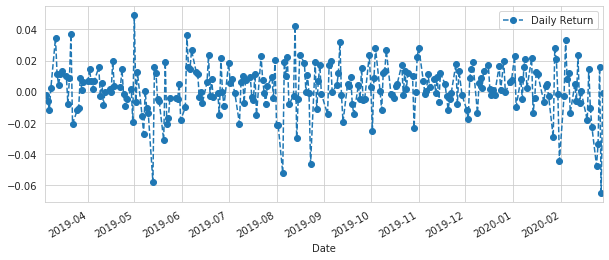

In [22]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

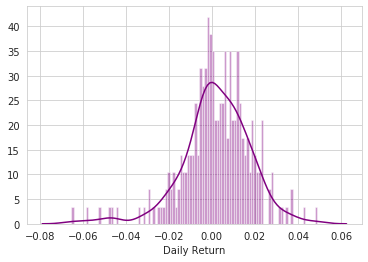

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

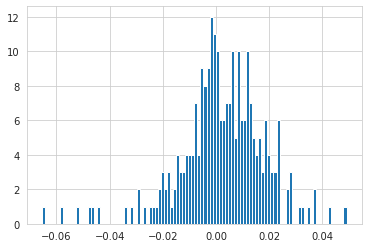

In [24]:
AAPL['Daily Return'].hist(bins=100)

In [0]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'], 'yahoo', start, end)['Adj Close']

In [26]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-04,173.578033,1147.800049,110.794128,1696.170044
2019-03-05,173.262161,1162.030029,110.241432,1692.430054
2019-03-06,172.265228,1157.859985,110.290787,1668.949951
2019-03-07,170.271317,1143.300049,108.948540,1625.949951
2019-03-08,170.676025,1142.319946,109.066978,1620.800049


In [0]:
tech_rets = closing_df.pct_change()

In [28]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-04,NaN,NaN,NaN,NaN
2019-03-05,-0.001820,0.012398,-0.004988,-0.002205
2019-03-06,-0.005754,-0.003589,0.000448,-0.013874
2019-03-07,-0.011575,-0.012575,-0.012170,-0.025765
2019-03-08,0.002377,-0.000857,0.001087,-0.003167
...,...,...,...,...
2020-02-24,-0.047500,-0.042771,-0.043115,-0.041356
2020-02-25,-0.033872,-0.023312,-0.016502,-0.018191
2020-02-26,0.015864,0.003407,0.012495,0.003472


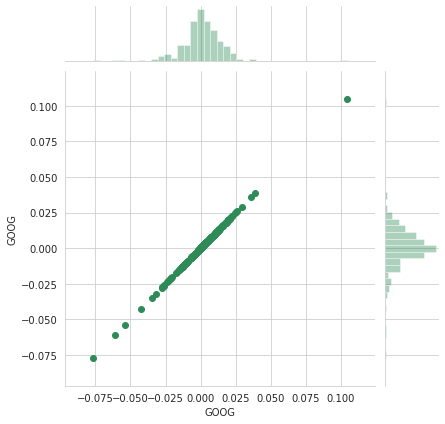

In [29]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

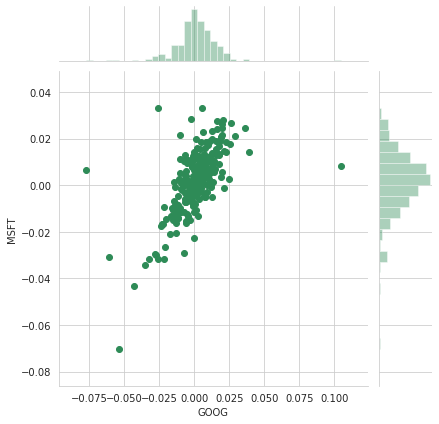

In [30]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')